In [1]:
import sys
sys.path.append("..")

%load_ext autoreload
%autoreload complete

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from enspred.plotting import format_plot, save_plot

# Standard normal

In [3]:
def plot_var_vs_err(variance):
    Ne = 500
    Nc = 500
    rng = np.random.default_rng(seed=20231020)
    sample = rng.normal(0, 1, (Ne, Nc))
    verification = rng.normal(0, np.sqrt(variance), (1, Nc))

    mean = np.mean(a=sample, axis=0)
    var = np.var(a=sample, axis=0, ddof=1)
    err = (mean - verification)**2

    average_var = np.mean(var)
    average_err = np.mean(err)

    fig, ax = plt.subplots(figsize=(6, 6))

    max_err = 5
    # max_err = max(np.amax(var), np.amax(err))

    ax.scatter(var, err)

    ax.scatter(average_var, average_err, marker="p", s=100, label="Average")
    ax.annotate(
        f"Average: ({average_var:.3f}, {average_err:.3f})",
        (average_var, average_err),
        (average_var + 0.1 * max_err, average_err + 0.1 * max_err),
        arrowprops=dict(arrowstyle="-|>", color="C2"),
        fontsize=14)

    ax.set_aspect("equal")
    ax.set_xlim([-0.05 * max_err, 1.05 * max_err])
    ax.set_ylim([-0.05 * max_err, 1.05 * max_err])
    ax.set_xlabel("Ensemble sample variance")
    ax.set_ylabel("Squared ensemble error")

    format_plot()
    save_plot("../latex/hw2/figures/", f"var_vs_err_{variance:.2f}")

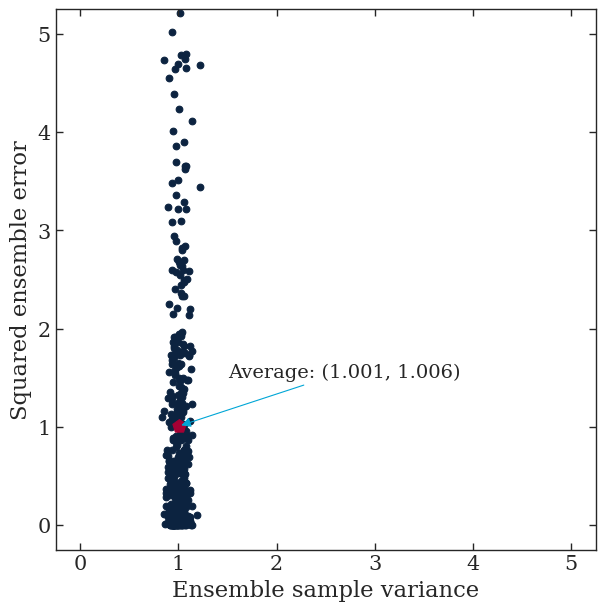

In [4]:
plot_var_vs_err(1)

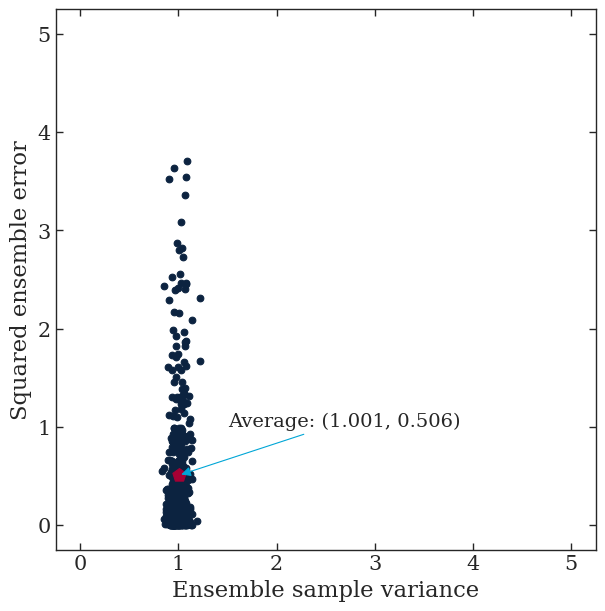

In [5]:
plot_var_vs_err(0.5)